#Notebook: Modelado Gaussiano
###Por: Maria Camila Remolina Gutiérrez

En este notebook se hace un fit gaussiano a una fuente

In [1]:
%pylab inline
import os, copy
from astropy.io import fits
from scipy.optimize import leastsq

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Paths
path_modelado = './imagenes/modelado_gaussiano/'

In [3]:
visita = fits.open('./imagenes/graficas/media.fits')

data = visita[0].data

visita.close()

shape_data = shape(data)
print shape_data

(1200, 1200)


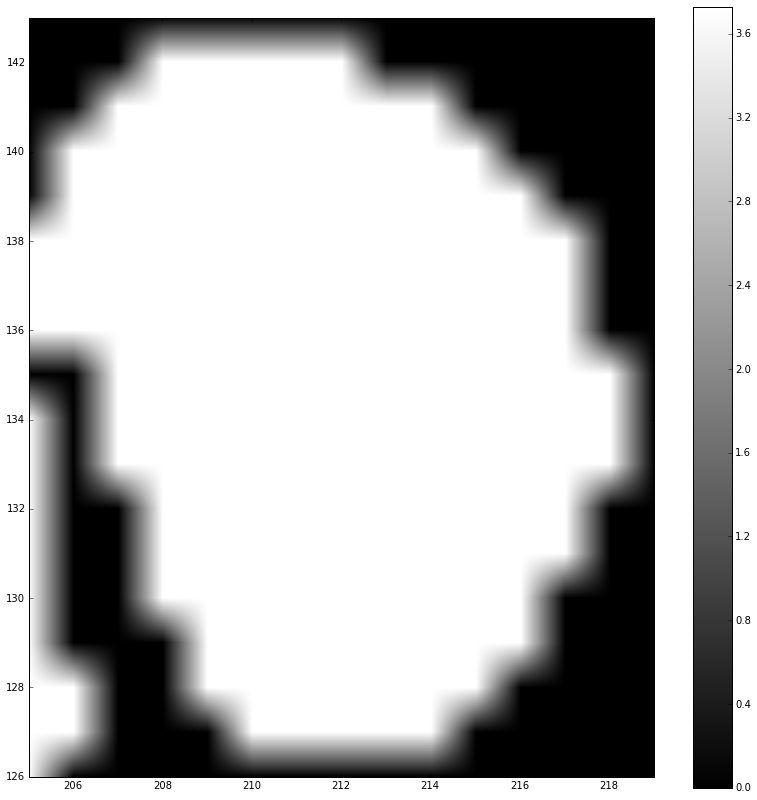

In [4]:
fig = figure(figsize=(14,14))
imshow(data, cmap='gray',vmin=0,vmax=3.73)
colorbar()
xlim(205,219)
ylim(126,143)
show()
close()

In [5]:
recorte = data[126:143,205:219]

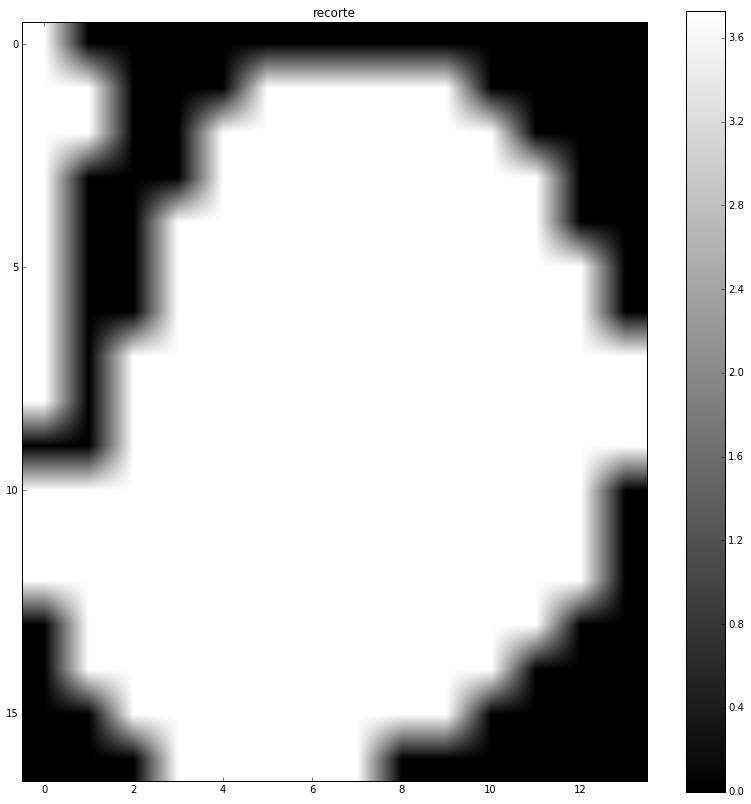

In [6]:
fig = figure(figsize=(14,14))
imshow(recorte, cmap='gray',vmin=0,vmax=3.73)
colorbar()
title('recorte')
savefig(path_modelado+'recorte.png', bbox_inches='tight')
show()
close()

In [7]:
#Fuente: https://gist.github.com/andrewgiessel/6122739

#La rotacion entra en radianes
def gaussiana(x_0, y_0, sigma_x, sigma_y, amplitud, rotacion):

    x_0 = x_0*cos(rotacion) - y_0*sin(rotacion)
    y_0 = x_0*sin(rotacion) + y_0*cos(rotacion)
    
    def rotgauss(x,y):
        xp = x*cos(rotacion) - y*sin(rotacion)
        yp = x*sin(rotacion) + y*cos(rotacion)
        g = amplitud*exp( -( ((xp-x_0)/sigma_x)**2 + ((yp-y_0)/sigma_y)**2 )/2. )
        
        return g
    
    return rotgauss

#Retorna x_0, y_0, sigma_x, sigma_y, amplitud, rotacion
def momentos(matriz):
    total = matriz.sum()
    X, Y = indices(matriz.shape)
    x_0 = (X*matriz).sum()/total
    y_0 = (Y*matriz).sum()/total
    col = matriz[:, int(y_0)]
    sigma_x = np.sqrt(abs((np.arange(col.size)-y_0)**2*col).sum()/col.sum())
    row = matriz[int(x_0), :]
    sigma_y = np.sqrt(abs((np.arange(row.size)-x_0)**2*row).sum()/row.sum())
    amplitud = matriz.max()
    return x_0, y_0, sigma_x, sigma_y, amplitud, 0.0

#Retorna x_0, y_0, sigma_x, sigma_y, amplitud, rotacion despues del fit
def fit_gaussiana(matriz):
    parametros = momentos(matriz)
    errorfunction = lambda p: ravel(gaussiana(*p)(*indices(matriz.shape)) - matriz)
    p, exito = leastsq(errorfunction, parametros)
    return p

In [8]:
recorte_x_0, recorte_y_0, recorte_sigma_x, recorte_sigma_y, recorte_amplitud, recorte_rotacion = fit_gaussiana(recorte)
print recorte_x_0, recorte_y_0, recorte_sigma_x, recorte_sigma_y, recorte_amplitud, recorte_rotacion

8.35202521526 5.14342018323 2.94589041478 2.56637022611 520.939306682 0.227523484114


In [9]:
recorte_rotgauss = gaussiana(recorte_x_0, recorte_y_0, recorte_sigma_x, recorte_sigma_y, recorte_amplitud, recorte_rotacion)

In [10]:
recorte_fit = recorte_rotgauss(*indices(recorte.shape))

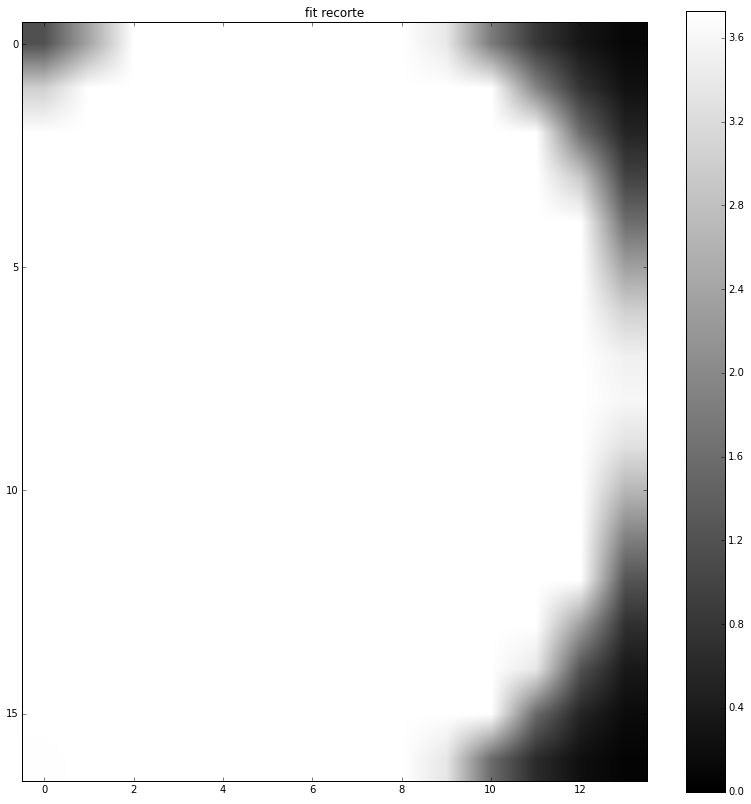

In [11]:
fig = figure(figsize=(14,14))
imshow(recorte_fit, cmap='gray',vmin=0,vmax=3.73)
colorbar()
title('fit recorte')
savefig(path_modelado+'recorte_fit.png', bbox_inches='tight')
show()
close()

In [12]:
print amax(recorte)
print amax(recorte_fit)

568.496881485
517.725341879


In [13]:
#Quitandole el ruido de al lado

In [14]:
recorte_2 = copy.deepcopy(recorte)

In [15]:
print shape(recorte_2)

(17, 14)


In [16]:
for i in range(9):
    recorte_2[i,0] = 0.0

for i in range(3):
    recorte_2[i,1] = 0.0

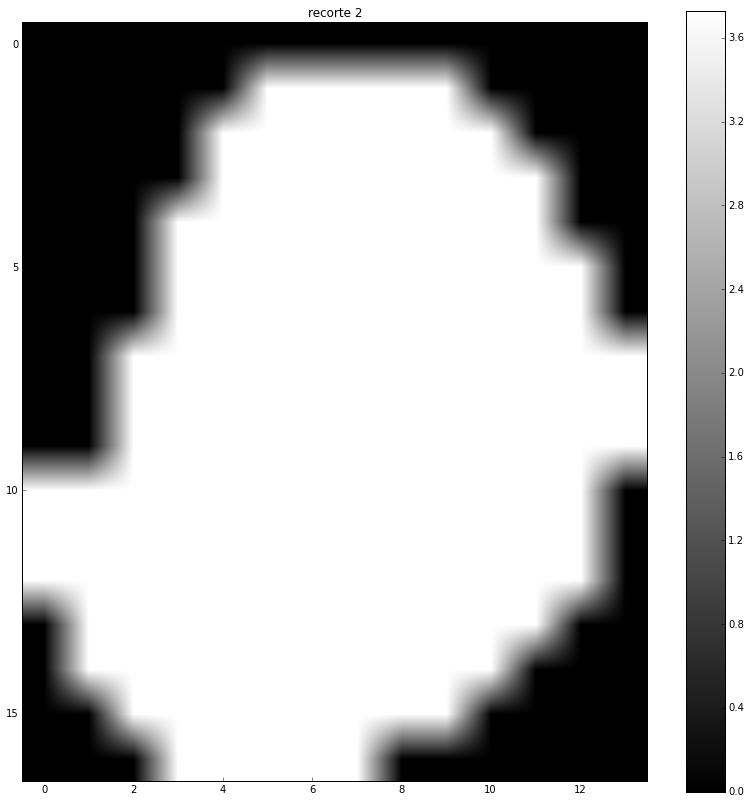

In [17]:
fig = figure(figsize=(14,14))
imshow(recorte_2, cmap='gray',vmin=0,vmax=3.73)
colorbar()
title('recorte 2')
savefig(path_modelado+'recorte_2.png', bbox_inches='tight')
show()
close()

In [18]:
recorte_2_x_0, recorte_2_y_0, recorte_2_sigma_x, recorte_2_sigma_y, recorte_2_amplitud, recorte_2_rotacion = fit_gaussiana(recorte_2)
print recorte_2_x_0, recorte_2_y_0, recorte_2_sigma_x, recorte_2_sigma_y, recorte_2_amplitud, recorte_2_rotacion

8.4850573752 5.48886961939 2.95831326672 2.29125104694 543.399627023 0.292454512732


In [19]:
recorte_2_rotgauss = gaussiana(recorte_2_x_0, recorte_2_y_0, recorte_2_sigma_x, recorte_2_sigma_y, recorte_2_amplitud, recorte_2_rotacion)

In [20]:
recorte_2_fit = recorte_2_rotgauss(*indices(recorte_2.shape))

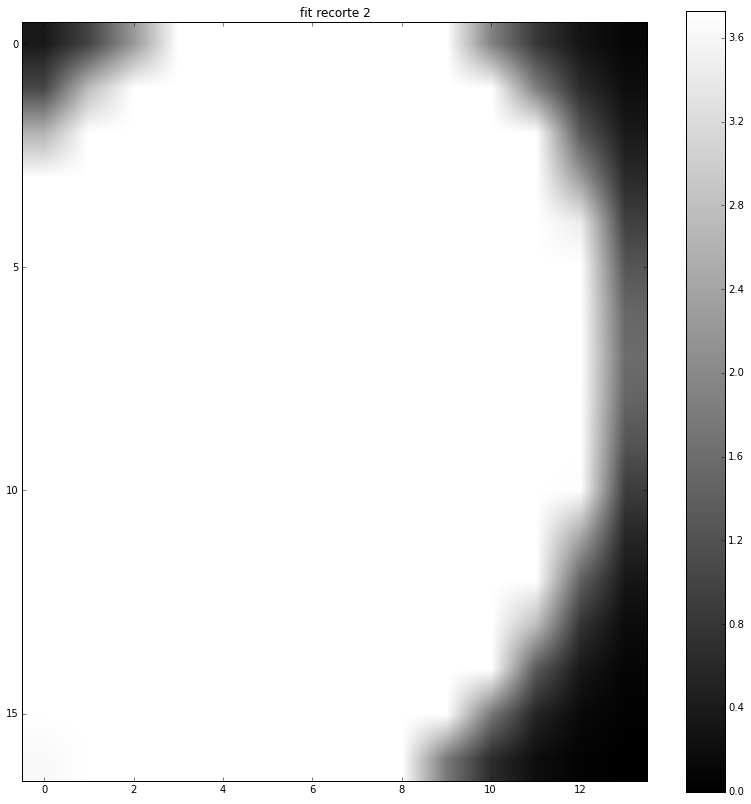

In [21]:
fig = figure(figsize=(14,14))
imshow(recorte_2_fit, cmap='gray',vmin=0,vmax=3.73)
colorbar()
title('fit recorte 2')
savefig(path_modelado+'recorte_2_fit.png', bbox_inches='tight')
show()
close()

In [22]:
print amax(recorte_2)
print amax(recorte_2_fit)

568.496881485
540.042141043


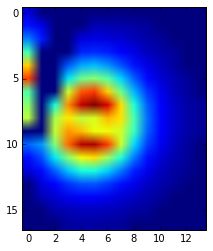

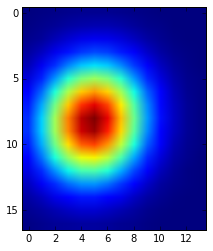

In [23]:
imshow(recorte)
show()
close()

imshow(recorte_fit)
show()
close()

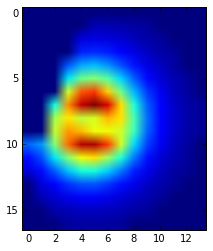

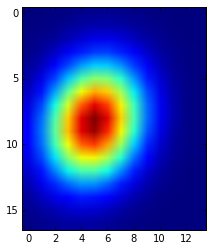

In [24]:
imshow(recorte_2)
show()
close()

imshow(recorte_2_fit)
show()
close()

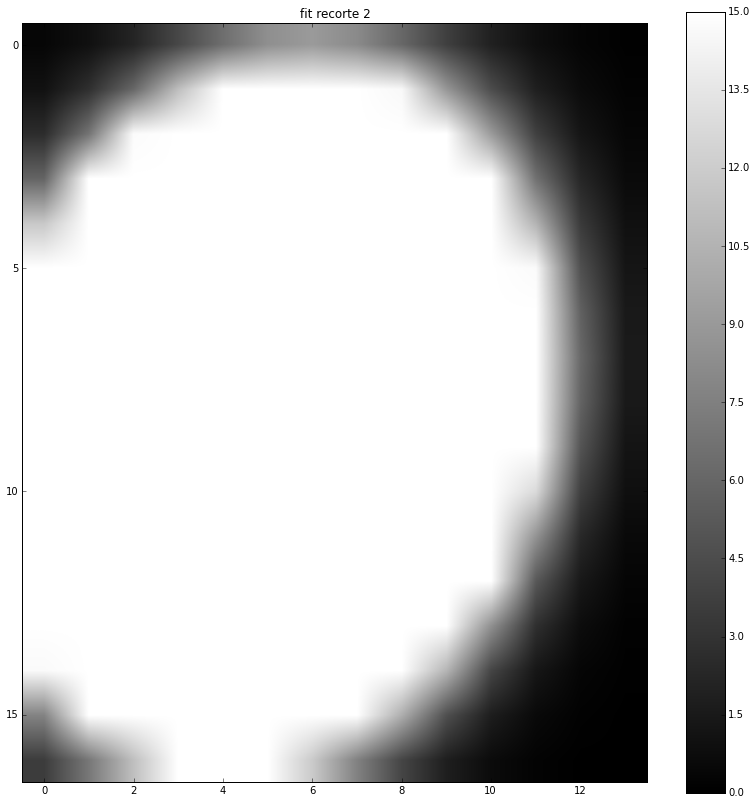

In [25]:
fig = figure(figsize=(14,14))
imshow(recorte_2_fit, cmap='gray',vmin=0,vmax=15)
colorbar()
title('fit recorte 2')
savefig(path_modelado+'recorte_2_fit_vmax.png', bbox_inches='tight')
show()
close()